<h1 style="background-color:#32db6e; color:white ; padding: 20px 30px; border-radius:10px; font-size:25px; text-align:center;">MODELISATION STOCHASTIQUE  - Régression Lineaire Multiple</h1>


<h4 style="font-size: 30px;background-color:#4CAF50;color:white;border-radius: 8px; padding:12px">Importer les bibliothèques</h4>

In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import f
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm

 

# Ignorer tous les avertissements
import warnings
warnings.filterwarnings("ignore")

<h4 style="font-size: 30px;background-color:#4CAF50;color:white;border-radius: 8px; padding:12px">Chargement des données</h4>

In [2]:
df=pd.read_csv("Student_Performance.csv",header=0)

<h4 style="font-size: 30px;background-color:#4CAF50;color:white;border-radius: 8px; padding:12px">Visualiser le type des données des colonnes et quelques informations</h4>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


<h4 style="font-size: 30px;background-color:#4CAF50;color:white;border-radius: 8px; padding:12px">Dimension du dataset</h4>


In [4]:
info_df = pd.DataFrame({
    'Nombre de lignes': [df.shape[0]],
    'Nombre de colonnes': [df.shape[1]]
})
info_df

,Nombre de lignes,Nombre de colonnes
0,10000,6


<h4 style="font-size: 30px;background-color:#4CAF50;color:white;border-radius: 8px; padding:12px">Afficher les 5 premiers enregistrements</h4>


In [5]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [6]:
noms_col = pd.DataFrame({
    'Nom de la colonne':[df.columns[i] for i in range(len(df.columns))]
})
noms_col

,Nom de la colonne
0,Hours Studied
1,Previous Scores
2,Extracurricular Activities
3,Sleep Hours
4,Sample Question Papers Practiced
5,Performance Index


<h4 style="font-size: 30px;background-color:#4CAF50;color:white;border-radius: 8px; padding:12px">Changer les noms des colonnes</h4>

In [7]:
# Créer un dictionnaire de mapping des noms des colonnes en français

colonnes = {
    'Hours Studied': 'Heures_détude',
    'Previous Scores': 'Scores_précédents',
    'Extracurricular Activities': 'Activités_parascolaires',
    'Sleep Hours': 'Heures_de_sommeil',
    'Sample Question Papers Practiced': 'Exercices_pratiqués_sur_des_questions_types',
    'Performance_Index': 'Indice_de_performance'
}

# Renommer les colonnes du DataFrame 
df.rename(columns=colonnes, inplace=True)

<h4 style="font-size: 30px;background-color:#4CAF50;color:white;border-radius: 8px; padding:12px">Les nouveaux noms des colonnes</h4>

In [8]:
noms_col = pd.DataFrame({
    'Nom de la colonne':[df.columns[i] for i in range(len(df.columns))]
})
noms_col

,Nom de la colonne
0,Heures_détude
1,Scores_précédents
2,Activités_parascolaires
3,Heures_de_sommeil
4,Exercices_pratiqués_sur_des_questions_types
5,Performance Index


<h4 style="font-size: 30px;background-color:#4CAF50;color:white;border-radius: 8px; padding:12px">Nettoyage du dataset</h4>

In [9]:
#Voir le nombre des valeurs manquantes dans chaque colonne

df.isna().sum()

Heures_détude                                  0
Scores_précédents                              0
Activités_parascolaires                        0
Heures_de_sommeil                              0
Exercices_pratiqués_sur_des_questions_types    0
Performance Index                              0
dtype: int64

<h3 style="color:black">Le dataset ne contient aucune valeur manquante</h3>

In [10]:
# Compter le nombre total des duplications dans l'ensemble du DataFrame

print("Nombre total des duplications dans le dataset :", df.duplicated().sum())

Nombre total des duplications dans le dataset : 127


In [11]:
#Supprimer les duplications
df.drop_duplicates(inplace=True)

#Compter le nombre total des duplications dans l'ensemble du DataFrame
print("Nombre total des duplications dans le dataset :", df.duplicated().sum())

Nombre total des duplications dans le dataset : 0


In [12]:
print("Le nombre de lignes après suppession des duplications est :",df.shape[0])

Le nombre de lignes après suppession des duplications est : 9873


<h4 style="font-size: 30px;background-color:#4CAF50;color:white;border-radius: 8px; padding:12px">Analyse Exploratoire</h4>

In [13]:
# Voir des informations sur les valeurs numériques

df.describe()

,Heures_détude,Scores_précédents,Heures_de_sommeil,Exercices_pratiqués_sur_des_questions_types,Performance Index
count,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000
mean,4.992100,69.441102,6.531652,4.583004,55.216651
std,2.589081,17.325601,1.697683,2.867202,19.208570
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


<h4 style="font-size: 30px;background-color:#4CAF50;color:white;border-radius: 8px; padding:12px">Visualisation des données</h4>

<h5 style="color:#4CAF50">Scatter plot pour chaque paire de variables</h5>

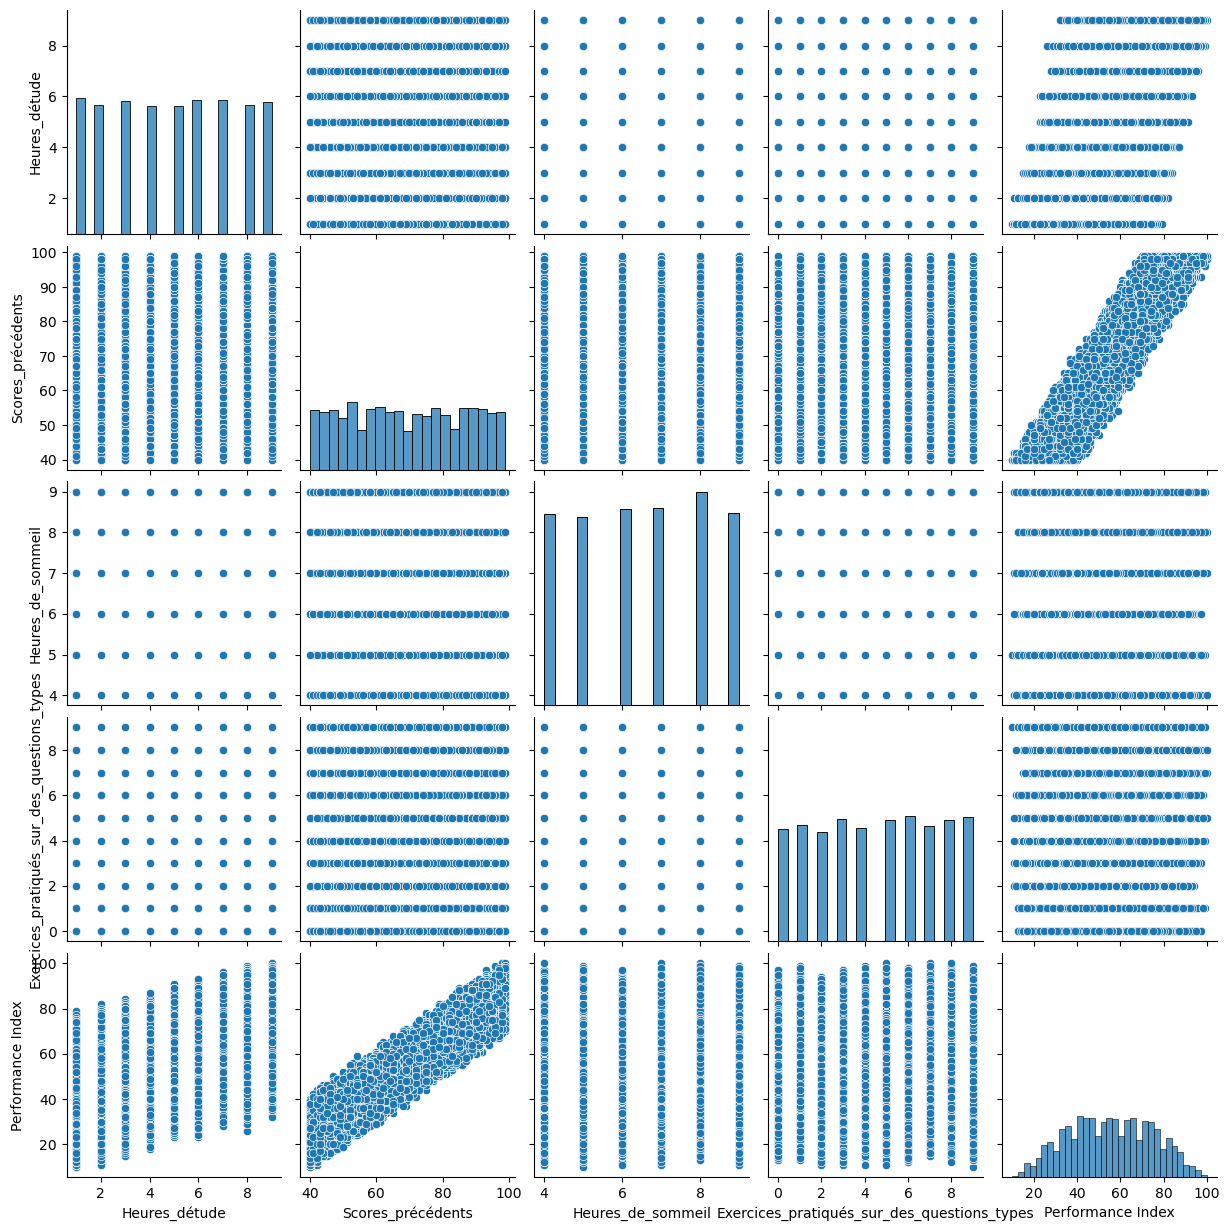

In [14]:
# Créez un scatter plot pour chaque paire de variables

sns.pairplot(df)
plt.show()


<h5 style="color:#4CAF50">Histogramme pour chaque variable numérique</h5>

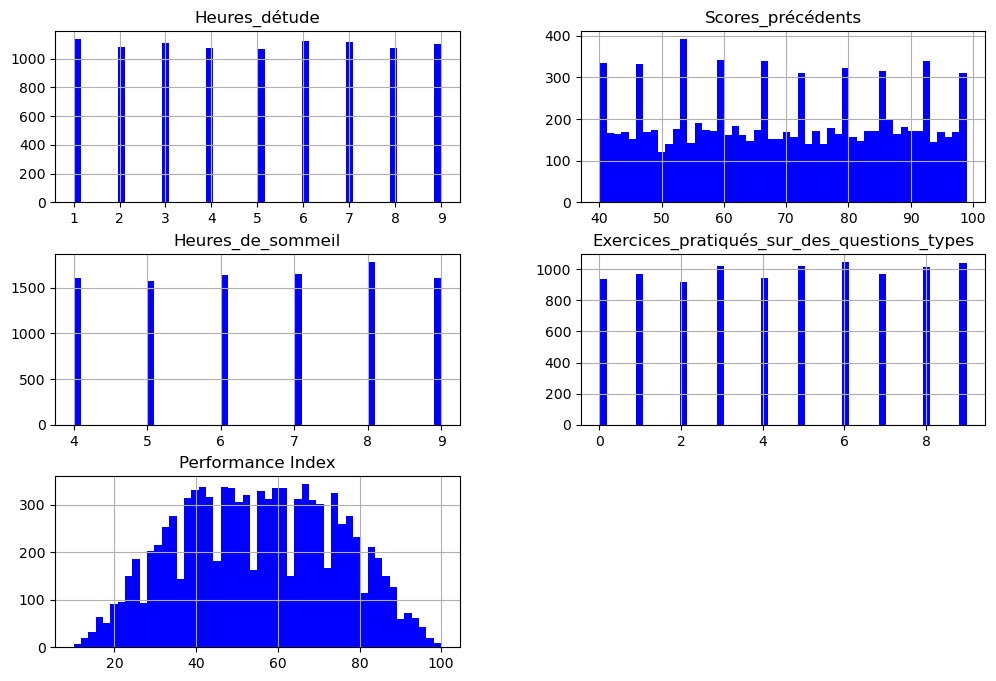

In [15]:
df.hist(bins=50 , figsize=(12,8), color='blue')
plt.show()

<h5>Distributions uniformes des variables dans notre dataset.<br> 
Ces graphiques révèlent une dispersion régulière des étudiants à travers différentes catégories, offrant une vision synthétique des relations entre habitudes d'étude, performances passées et résultats académiques.</h5>

<h4 style="color:#4CAF50">Créer une Fonction pour visualiser le décompte des valeurs d'une variable spécifiée, avec la possibilité de séparer par teinte.</h4>

In [16]:
def count_plot(column_name, hue = None, rotation = 0):
    graph = sns.countplot(x = column_name, data = df, hue = hue, order = df[column_name].value_counts().index)
    for container in graph.containers:
        graph.bar_label(container)   
    plt.xticks(rotation = rotation)
    plt.show()

In [17]:
print("Les valeurs de la variable 'Heures_détude' sont :", df["Heures_détude"].unique())

Les valeurs de la variable 'Heures_détude' sont : [7 4 8 5 3 6 2 1 9]


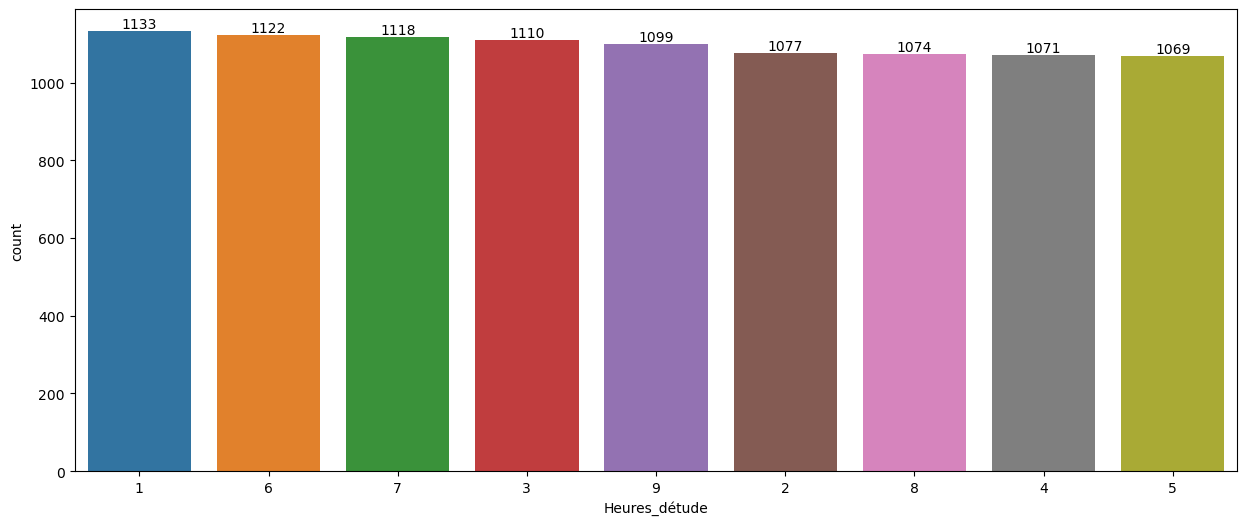

In [18]:
# le nombre des valeurs uniques est relativement grand, le tracé de comptage est plus approprié
plt.figure(figsize = (15,6))
count_plot(column_name = "Heures_détude")

<h4>La plupart des étudiants préfèrent étudier pendant une heure, avec d'autres optant pour des durées similaires.
</h4>

<h4 style="color:#4CAF50">Créer une fonction pour générer des diagrammes en boîte, Box plots, illustrant la distribution des fréquences.</h4>

In [19]:
def box_plot(x_axis=None, y_axis=None, hue=None, col=None):
    sns.catplot(x=x_axis, y=y_axis, data=df, hue=hue, kind="box")
    plt.xlabel(x_axis)
    plt.ylabel("FRQ")

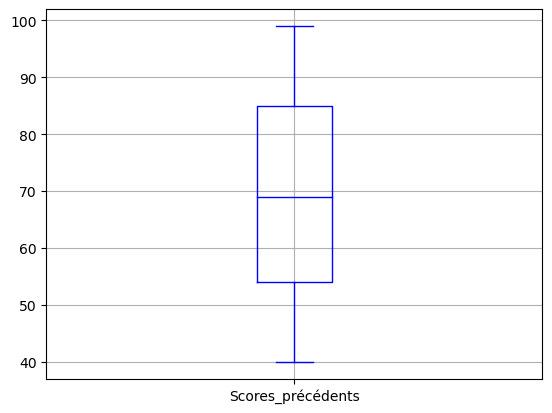

In [20]:
#Voir la distribution 
df.boxplot(column="Scores_précédents", color="blue", vert=True)
plt.show()

<p>
    Le diagramme en boîte pour les "Scores précédents" indique une médiane de score d'environ 70, avec un premier quartile autour de 53 et un troisième quartile d'environ 85. La majorité des étudiants se concentrent dans cette gamme, montrant une faible dispersion en dehors de ces limites. Les scores extrêmes sont rares, suggérant une concentration significative des résultats sans une variabilité importante.
</p>

In [21]:
print("Les valeurs de la variable 'Activités_parascolaires' sont:",df["Activités_parascolaires"].unique())

Les valeurs de la variable 'Activités_parascolaires' sont: ['Yes' 'No']


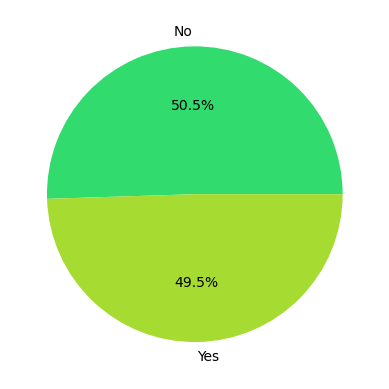

In [22]:
plt.pie(df["Activités_parascolaires"].value_counts(), 
labels=df["Activités_parascolaires"].value_counts().index,
autopct="%1.1f%%", colors=["#32db6e","#a6db32"])  
plt.show()


<h4 style="color:black">
La participation des étudiants aux activités parascolaires est équitablement répartie, avec environ 49,5% des étudiants participant ("Oui") et 50,5% ne participant pas ("Non").
</h4>

In [23]:
print("Les valeurs de la variable 'Heures_de_sommeil' sont :", df["Heures_de_sommeil"].unique())

Les valeurs de la variable 'Heures_de_sommeil' sont : [9 4 7 5 8 6]


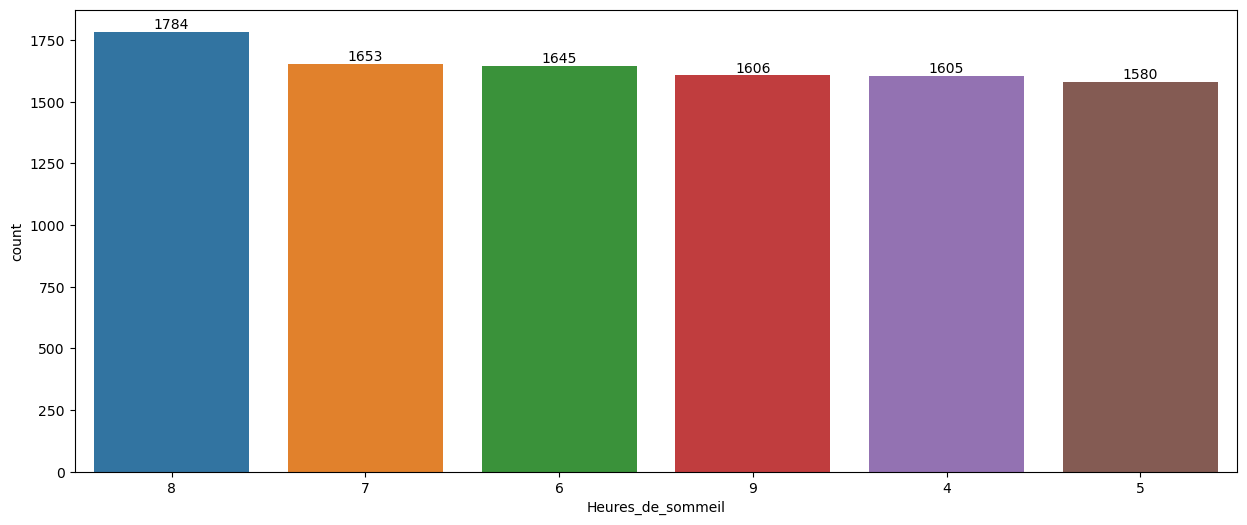

In [24]:
#Le nombre de valeurs uniques est relativement grand, le tracé de comptage lui convient mieux
plt.figure(figsize = (15,6))
count_plot(column_name = "Heures_de_sommeil")

<h4>
La plupart des étudiants dorment 8 heures par nuit, avec une préférence générale pour une plage de sommeil de 6 à 9 heures, indiquant une distribution équilibrée au sein de la population étudiante.
</h4>

In [25]:
print("Les valeurs de la variable 'Exercices_pratiqués_sur_des_questions_types' sont :", df["Exercices_pratiqués_sur_des_questions_types"].unique())

Les valeurs de la variable 'Exercices_pratiqués_sur_des_questions_types' sont : [1 2 5 6 0 8 3 4 9 7]


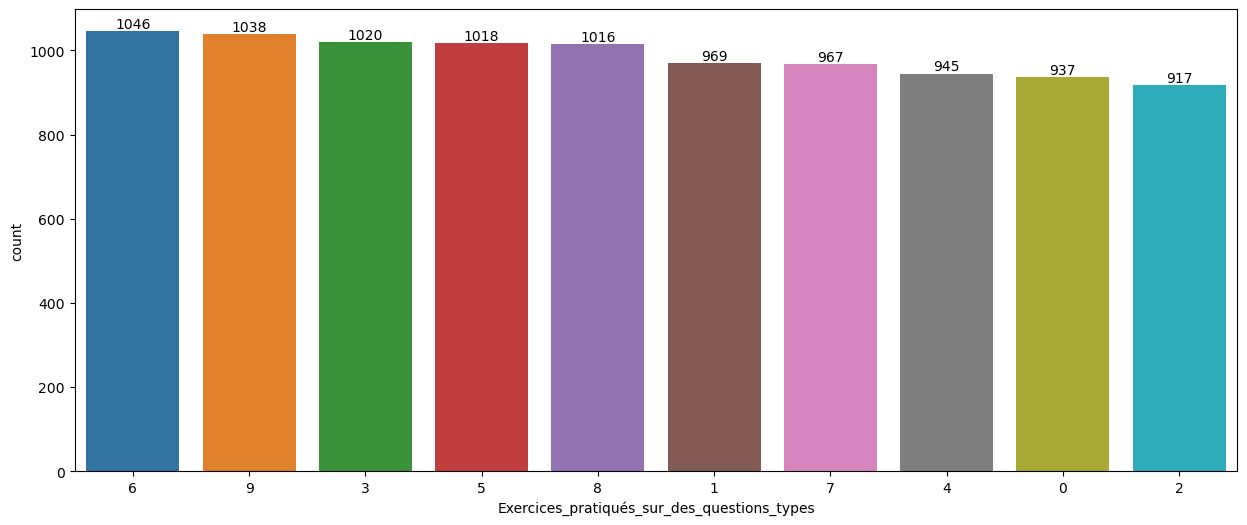

In [26]:
plt.figure(figsize = (15,6))
count_plot(column_name = "Exercices_pratiqués_sur_des_questions_types")

<h4>
La majorité des étudiants privilégient la pratique de 6 exercices, avec des variations significatives dans les autres niveaux d'activité.
</h4>

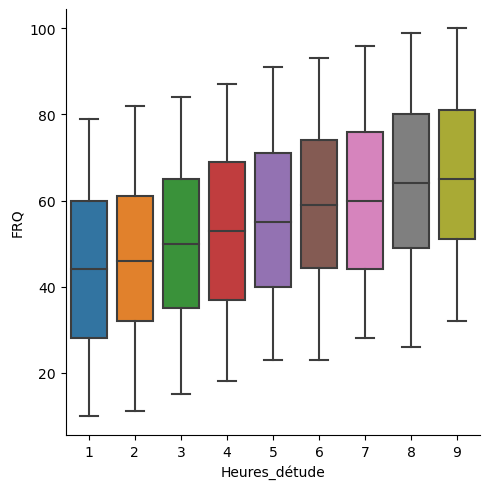

In [27]:
# Répartition des Heures d'études et de l'Indice de performance
box_plot(x_axis = "Heures_détude", y_axis = "Performance Index") 
plt.show()

<h4 style="color:black">Les performances académiques augmentent avec le nombre d'heures d'étude, illustrée par l'augmentation graduelle des médianes.<h4>

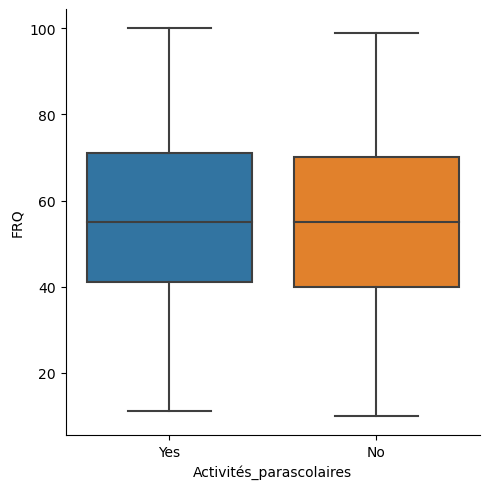

In [28]:
# Répartition des Activités périscolaires et de l'Indice de performance 
box_plot(x_axis = "Activités_parascolaires", y_axis = "Performance Index")
plt.show()

<h4 style="color:black">Les médianes proches suggèrent que la participation à de telles activités parascolaires n'affecte pas significativement la performance moyenne des étudiants.</h4>

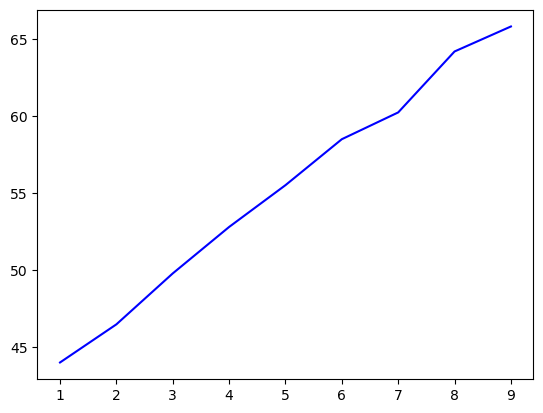

In [29]:
# Répartition des Heures d'étude et de l'Indice de performance
avg_performance_by_hours = df.groupby('Heures_détude')['Performance Index'].mean()
plt.plot(avg_performance_by_hours.index, avg_performance_by_hours.values,color="blue")
plt.show()

<h4 style="color:black">Augmentation constante de la performance à mesure que le temps d'étude augmente de 1 à 9 heures. Cela suggère que les étudiants consacrant plus de temps aux études ont tendance à avoir de meilleures performances.</h4>

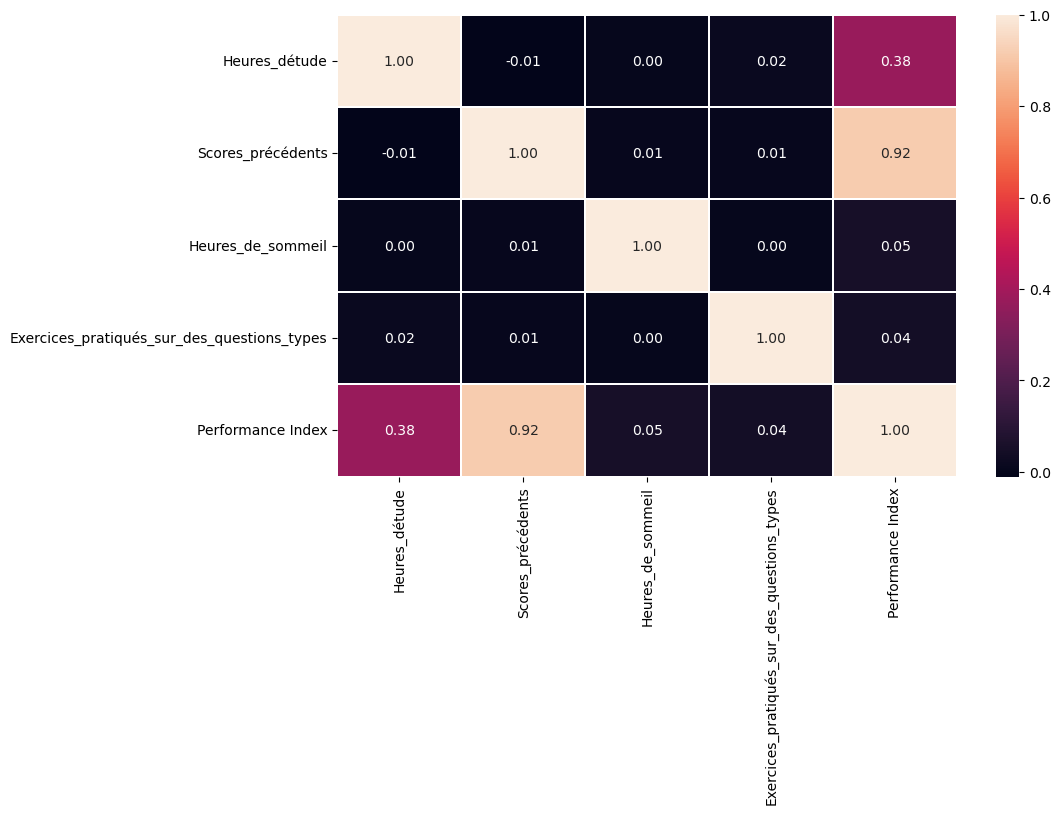

In [30]:
# Visualiser la matrice de corrélation entre les colonnes numériques
plt.figure(figsize = (10,6))
sns.heatmap(df.select_dtypes(exclude = object).corr(), annot = True, fmt = ".2f", linewidths = 0.2)
plt.show()

<p style="color:black">Les corrélations de la matrice révèlent des associations variables entre les habitudes d'étude, les performances passées, le sommeil et la pratique d'exercices, soulignant des liens positifs avec les "Heures d'étude" et les "Scores précédents", mais des résultats surprenants tels qu'une faible corrélation entre la pratique d'exercices et la performance académique.</p>

<h4 style="font-size: 30px;background-color:#4CAF50;color:white;border-radius: 8px; padding:12px">Préparation des données</h4>

In [31]:
#Encoder les valeurs de la colonne Activités_parascolaires (de Yes/No à 1/0)
encoder = LabelEncoder()
df["Activités_parascolaires"] =  encoder.fit_transform(df["Activités_parascolaires"])

In [32]:
df.head()

,Heures_détude,Scores_précédents,Activités_parascolaires,Heures_de_sommeil,Exercices_pratiqués_sur_des_questions_types,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [33]:
# Diviser les données en variables indépendantes et variable dépendante.
X = df.drop(columns = "Performance Index") #Train
y = df["Performance Index"] #Target

<h4 style="font-size: 30px;background-color:#4CAF50;color:white;border-radius: 8px; padding:12px">Regression sur chaque variable</h4>

In [34]:
#Fonction d'entrainement du modèle sur chaque variable
def lm(x):
    df['const'] = 1
    # Définir les variables dépendantes et la variable indépendante
    Y = df['Performance Index']
    X1 = df[['const', x]]
    # Ajuster le modèle linéaire
    lm1 = sm.OLS(Y, X1).fit()
    # Afficher les résultats du modèle
    print(lm1.summary())
    
    # Calculer et afficher le QQ plot des résidus
    residuals = lm1.resid
    qqplot(residuals[:50], line='s', color='blue')
    plt.title("QQ Plot des résidus")
    plt.show()
    
    R2_model = lm1.rsquared
    R2_adj_model = lm1.rsquared_adj
    Fcalc_model = lm1.fvalue
    
    n = df.shape[0]
    p = 1
    Ftbl_model = f.isf(0.05, p, n-(p+1))
    return pd.DataFrame([R2_model*100,R2_adj_model*100,Fcalc_model,Ftbl_model], index=['R2','R2_adj','Fcalc','Ftbl_model'],columns=[x]) 

<h3 style="background-color:#808080;color:white;border-radius: 8px; padding:12px;display:inline-block;width:500px" ><b>Regression sur Heures_détude </b></h3>

                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     1619.
Date:                Mon, 08 Jan 2024   Prob (F-statistic):               0.00
Time:                        01:34:20   Log-Likelihood:                -42437.
No. Observations:                9873   AIC:                         8.488e+04
Df Residuals:                    9871   BIC:                         8.489e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            41.3156      0.389    106.148

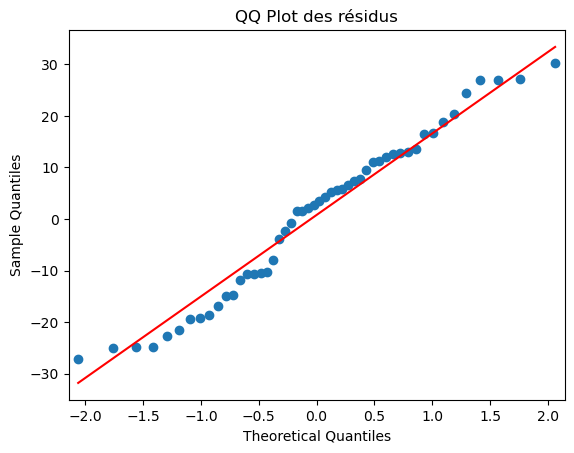

,Heures_détude
R2,14.087413
R2_adj,14.078710
Fcalc,1618.585346
Ftbl_model,3.842401


In [35]:
lm('Heures_détude')

<ul>
    <li ><b>On a <span style="color:red;">Fcal >> Ftbl</span> donc on rejette au niveau de risque 5% l'hypothèse H0 d'ou<br> 
<h2 style="color:black;">le modèle est globalement significatif</h2></b></li>    
</ul>

<h3 style="background-color:#808080;color:white;border-radius: 8px; padding:12px;display:inline-block;width:500px" ><b>Regression sur Scores_précédents </b></h3>

                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                 5.086e+04
Date:                Mon, 08 Jan 2024   Prob (F-statistic):               0.00
Time:                        01:34:21   Log-Likelihood:                -34218.
No. Observations:                9873   AIC:                         6.844e+04
Df Residuals:                    9871   BIC:                         6.845e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -15.2378      0.32

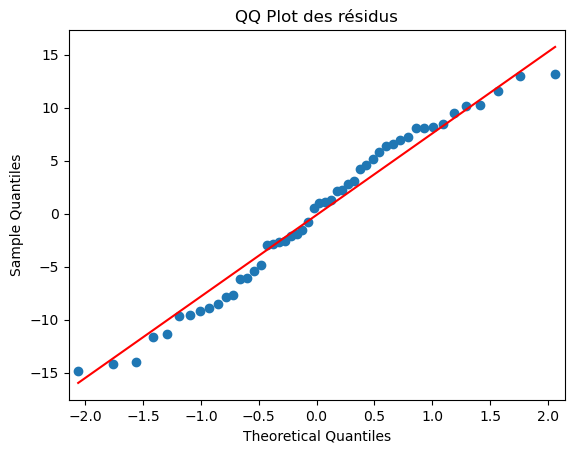

,Scores_précédents
R2,83.747221
R2_adj,83.745575
Fcalc,50863.230088
Ftbl_model,3.842401


In [36]:
lm('Scores_précédents')

<ul>
    <li ><b>On a <span style="color:red;">Fcal >> Ftbl</span> danc on rejette au niveau de risque 5% l'hypothèse H0 d'ou<br> 
<h2 style="color:black;">le modèle est globalement significatif</h2></b></li>    
</ul>

<h3 style="background-color:#808080;color:white;border-radius: 8px; padding:12px;display:inline-block;width:500px" ><b>Regression sur Activités_parascolaires </b></h3>

                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     6.716
Date:                Mon, 08 Jan 2024   Prob (F-statistic):            0.00957
Time:                        01:34:21   Log-Likelihood:                -43184.
No. Observations:                9873   AIC:                         8.637e+04
Df Residuals:                    9871   BIC:                         8.639e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

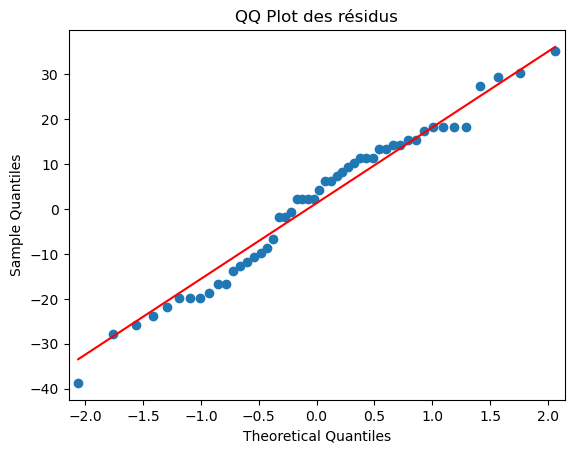

,Activités_parascolaires
R2,0.067988
R2_adj,0.057865
Fcalc,6.715704
Ftbl_model,3.842401


In [37]:
lm('Activités_parascolaires')

<ul>
    <li ><b>On a <span style="color:red;">Fcal > Ftbl</span> danc on rejette au niveau de risque 5% l'hypothèse H0 d'ou<br> 
<h2 style="color:black;">le modèle est globalement significatif</h2></b></li>    
</ul>

<h3 style="background-color:#808080;color:white;border-radius: 8px; padding:12px;display:inline-block;width:500px" ><b>Regression sur Heures_de_sommeil </b></h3>

                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     25.09
Date:                Mon, 08 Jan 2024   Prob (F-statistic):           5.57e-07
Time:                        01:34:22   Log-Likelihood:                -43174.
No. Observations:                9873   AIC:                         8.635e+04
Df Residuals:                    9871   BIC:                         8.637e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                51.4955      0.76

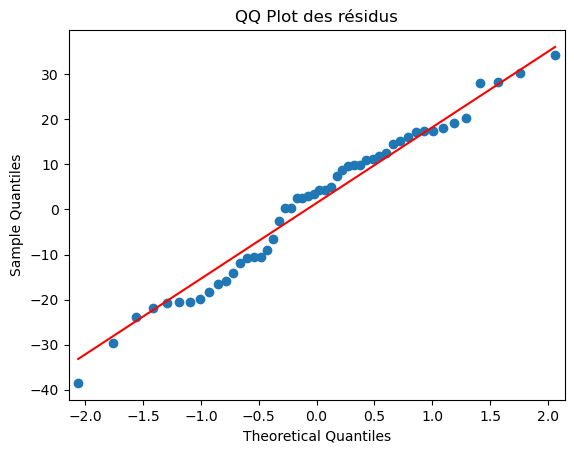

,Heures_de_sommeil
R2,0.253537
R2_adj,0.243432
Fcalc,25.090267
Ftbl_model,3.842401


In [38]:
lm('Heures_de_sommeil')

<ul>
    <li ><b>On a <span style="color:red;">Fcal > Ftbl</span> danc on rejette au niveau de risque 5% l'hypothèse H0 d'ou<br> 
<h2 style="color:black;">le modèle est globalement significatif</h2></b></li>    
</ul>

<h3 style="background-color:#808080;color:white;border-radius: 8px; padding:12px;display:inline-block;width:500px" ><b>Regression sur Exercices_pratiqués_sur_des_questions_types </b></h3>

                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     18.66
Date:                Mon, 08 Jan 2024   Prob (F-statistic):           1.58e-05
Time:                        01:34:22   Log-Likelihood:                -43178.
No. Observations:                9873   AIC:                         8.636e+04
Df Residuals:                    9871   BIC:                         8.637e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

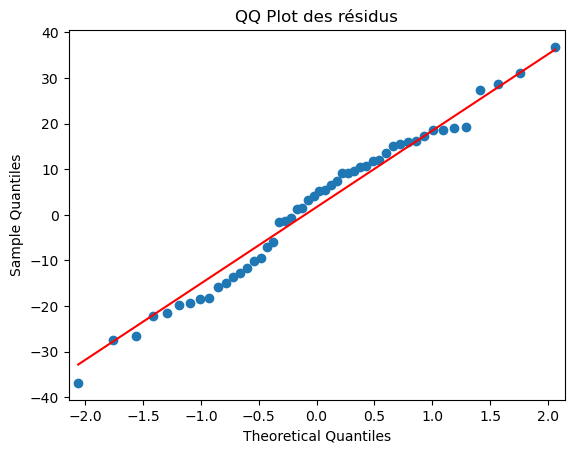

,Exercices_pratiqués_sur_des_questions_types
R2,0.188666
R2_adj,0.178555
Fcalc,18.658435
Ftbl_model,3.842401


In [39]:
lm('Exercices_pratiqués_sur_des_questions_types')

<ul>
    <li ><b>On a <span style="color:red;">Fcal > Ftbl</span> danc on rejette au niveau de risque 5% l'hypothèse H0 d'ou<br> 
<h2 style="color:black;">le modèle est globalement significatif</h2></b></li>    
</ul>

<h1 style="font-size: 30px;background-color:#4CAF50;color:white;border-radius: 8px; padding:12px"> Regression sur toutes les variables</h1>

<h2 style="font-size: 30px;background-color:black;color:white;border-radius: 8px; padding:12px"> Model avec statsmodels</h2>

<h3 style="background-color:#808080;color:white;border-radius: 8px; padding:12px;display:inline-block;width:500px" ><b>Entrainement du modèle</b></h3>

In [40]:
def lm1(X,y):
    return sm.OLS(y, sm.add_constant(X)).fit()

In [41]:
# Splitting data into Independent and Dependent Variable
X = df.drop(columns = ["const","Performance Index"])#Train
y = df["Performance Index"]#Target
model=lm1(X,y)

<h3 style="background-color:#808080;color:white;border-radius: 8px; padding:12px;display:inline-block;width:500px" ><b>Modèle</b></h3>

In [42]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Performance Index   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.724e+05
Date:                Mon, 08 Jan 2024   Prob (F-statistic):               0.00
Time:                        01:34:23   Log-Likelihood:                -21065.
No. Observations:                9873   AIC:                         4.214e+04
Df Residuals:                    9867   BIC:                         4.219e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                         -34.0689      0.128   -265.875      0.000     -34.320     -33.818
Heures_détude                                   2.8527      0.008    358.940      0.000       2.837       2.868
Scores_précédents                               1.0183      0.001    857.427      0.000       1.016       1.021
Activités_parascolaires                         0.6167      0.041     14.981      0.000       0.536       0.697
Heures_de_sommeil                               0.4803      0.012     39.623      0.000       0.457       0.504
Exercices_pratiqués_sur_des_questions_types     0.1939      0.007     27.017      0.000       0.180       0.208
==============================================================================
Omnibus:                        3.123   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.210   Jarque-Bera (JB):                3.224
Skew:                           0.014   Prob(JB):                        0.200
Kurtosis:                       3.084   Cond. No.                         451.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<p>Les coefficients significatifs et les faibles erreurs standard dans le tableau de régression linéaire multiple soulignent la fiabilité des résultats, mais l'attention est nécessaire pour le coefficient constant en raison de son impact négatif sur la variable dépendante.</p>

<h3 style="background-color:#808080;color:white;border-radius: 8px; padding:12px;display:inline-block;width:500px" ><b>Prédiction  des valeurs</b></h3>

In [43]:
#Fonction de prediction
def predire(x):
    x1=[1]+list(x)
    return np.sum(model.params*x1)   

In [44]:
def predire_indice(i):
    print(pd.DataFrame([predire(X.iloc[i,:]),y.iloc[i]], index=['Valeur prédite','Valeur réelle'],columns=['Exemple'+str(1+i)]))

In [45]:
#la prédiction du premier exemple
predire_indice(0)

                 Exemple1
Valeur prédite  91.847305
Valeur réelle   91.000000


In [46]:
#la predictinon des 5 premières valeurs
for i in range(5):
    predire_indice(i)

                 Exemple1
Valeur prédite  91.847305
Valeur réelle   91.000000
                 Exemple2
Valeur prédite  63.153299
Valeur réelle   65.000000
                 Exemple3
Valeur prédite  45.053968
Valeur réelle   45.000000
                 Exemple4
Valeur prédite  36.553459
Valeur réelle   36.000000
                 Exemple5
Valeur prédite  67.086264
Valeur réelle   66.000000


<p><b>La faible différence entre les valeurs réelles et prédites suggère la précision et la fiabilité de notre modèle de prédiction, indiquant son efficacité à capturer la relation entre les données d'entrée et de sortie pour notre dataset. Cela confirme le succès de notre modèle de prédiction.</b></p>

<h3 style="background-color:#808080;color:white;border-radius: 8px; padding:12px;display:inline-block;width:500px" ><b>Evaluation du modèle</b></h3>

In [47]:
R2_model = model.rsquared
R2_adj_model = model.rsquared_adj
Fcalc_model = model.fvalue

In [48]:
pd.DataFrame([R2_model*100,R2_adj_model*100,Fcalc_model], index=['R2','R2_adj','Fcalc'],columns=['Model'])

,Model
R2,98.868138
R2_adj,98.867565
Fcalc,172376.499436


<b>`Conclusion :` Les coefficients de détermination (R2) et ajusté (R2 ajusté) évaluent la capacité du modèle à expliquer la variance de la variable cible (Performance Index). <br>Les résultats, avec un R2 de 98,87% et un R2 ajusté de 98,87%, démontrent une excellente capacité du modèle à rendre compte de la variabilité de la cible.</b>

<h3 style="background-color:#808080;color:white;border-radius: 8px; padding:12px;display:inline-block;width:500px" ><b> Tests d’hypothèse sur chaque paramètre du modèle : <br>Test de Student</b></h3>

In [49]:
from scipy.stats import t
# degrés de liberté
n = df.shape[0]
p = 0.95
# calcul de la valeur de la table de student
value = t.ppf(p, n)
print("La valeur de la table de student pour n =", n, "et p =", p, "est", value)

La valeur de la table de student pour n = 9873 et p = 0.95 est 1.645007978516834


In [50]:
pd.DataFrame({'|tvalue|': np.abs(model.tvalues.tolist()), 'ttabl': [value] * len(model.tvalues)}, index=model.params.index)

,|tvalue|,ttabl
const,265.875182,1.645008
Heures_détude,358.939822,1.645008
Scores_précédents,857.427191,1.645008
Activités_parascolaires,14.981236,1.645008
Heures_de_sommeil,39.622553,1.645008
Exercices_pratiqués_sur_des_questions_types,27.017306,1.645008


<p>
    <b>Avec <span style="color:red;">|tcal| > ttbl</span> pour tous les coefficients, l'hypothèse nulle H0 est rejetée au niveau de risque de 5%. Par conséquent  : <h3>Les coefficients sont tous statiquement significatifs</h3>    
</p>

<h3 style="background-color:#808080;color:white;border-radius: 8px; padding:12px;display:inline-block;width:500px" ><b>Tests d’hypothèse global du modèle: <br>Test de Fisher</b></h3>

<ul>
<li>Calcul de la valeur de la table de Fisher pour un niveau de confiance de 95% et un degré de liberté numérateur (dfn) de p et un degré de liberté dénominateur (dfd) de n-(p+1)</li>    
</ul>

In [51]:
n = df.shape[0]
p = df.shape[1]
Ftbl_model = f.isf(0.05, p, n-(p+1))

In [52]:
pd.DataFrame([Ftbl_model,model.fvalue], index=['Ftbl','fcal'],columns=['Model'])

,Model
Ftbl,2.010515
fcal,172376.499436


<p>
<b>Avec <span style="color:red;">Fcal >> Ftbl</span> , l'hypothèse nulle H0 est rejetée au niveau de risque de 5%. Cela confirme que  :<h2 style="color:black;">Le modèle est globalement significatif</h2></b><b><br>indiquant que l'ensemble des variables indépendantes contribue de manière significative à l'explication de la variance de la variable dépendante.</b>
</p>

<h3 style="background-color:#808080;color:white;border-radius: 8px; padding:12px ;display:inline-block;width:550px" ><b>Intervalles de confiance des paramètres à 95 % de certitude</b></h3>

In [53]:
# Obtenir les intervalle de confiance des paramètres du modèle
alpha = 0.05 # 95% confidence interval
conf_interval = model.conf_int(alpha)

In [54]:
index = ['Intercept']+[col+" Coef." for col in X.columns]
conf_interval.index = index
conf_interval.columns = ["min","Max"]
conf_interval

,min,Max
Intercept,-34.320093,-33.817737
Heures_détude Coef.,2.837149,2.868308
Scores_précédents Coef.,1.015991,1.020647
Activités_parascolaires Coef.,0.536003,0.697384
Heures_de_sommeil Coef.,0.456559,0.504084
Exercices_pratiqués_sur_des_questions_types Coef.,0.179841,0.207979


<b>`Conclusion:` Les intervalles de confiance à 95 % pour les coefficients du modèle fournissent des indications sur la fiabilité des estimations. Si l'intervalle de confiance d'un coefficient n'inclut pas zéro, cela indique que le coefficient est significatif, contribuant de manière significative au modèle. D'après nos résultats, aucun des intervalles de confiance n'inclut zéro, ce qui confirme que tous les coefficients sont significatifs et ont une contribution importante au modèle.</b>

<h3 style="background-color:#808080;color:white;border-radius: 8px; padding:12px ;display:inline-block;width:550px" ><b>Analyse des résidus </b></h3>

In [55]:
residuals = model.resid

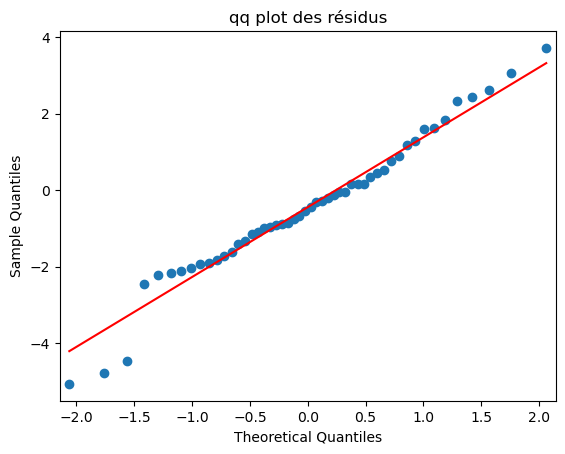

In [56]:
#Calculer et afficher le QQ plot des résidus
qqplot(residuals[:50], line='s',color='blue')
plt.title("qq plot des résidus")
plt.show()

<p><b>
Le QQ plot indique que les erreurs du modèle suivent approximativement une distribution normale, renforçant ainsi la validité du modèle statistique.</b></p>

<b> <ul><li> Plot de la distribution des résidus</li></ul></b>
  <br>


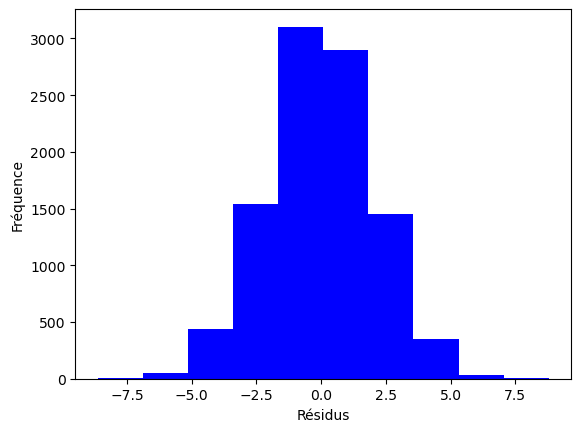

In [57]:
plt.hist(residuals,color='blue')
plt.xlabel("Résidus")
plt.ylabel("Fréquence")
plt.show()

<p><b> Les résidus présentent une distribution normale symétrique, indiquant une précision globale du modèle.</b></p>

<b><ul><li> Plot de la régression des résidus</li></ul></b>

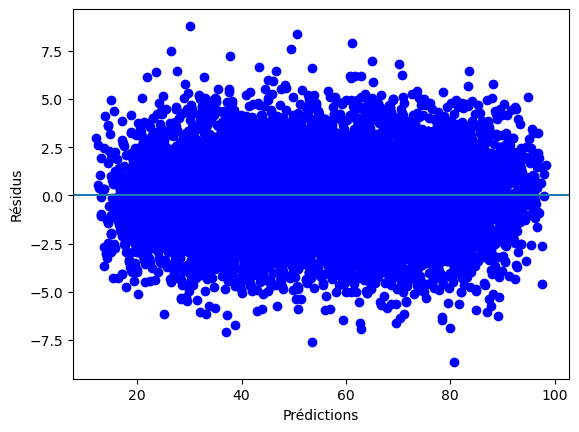

In [58]:
plt.scatter(model.predict(), residuals,color="blue")
plt.xlabel("Prédictions")
plt.ylabel("Résidus")
plt.axhline(y=0)
plt.show()


<b>Le Plot de régression confirme l'exactitude des prédictions, soulignant l'absence de biais systématique et une bonne adéquation du modèle aux données.</b>

<h3 style="background-color:#808080;color:white;border-radius: 8px; padding:12px ;display:inline-block;width:550px" ><b>Table ANOVA </b></h3>

In [59]:
# Créer le modèle OLS en utilisant une formule
formula = 'y ~ ' + ' + '.join(X.columns)
model_ols = sm.OLS.from_formula(formula, data=pd.concat([X, y], axis=1))

# Ajuster le modèle en utilisant la méthode fit
model_fit = model_ols.fit()

# Obtenir la table ANOVA
anova_table = pd.DataFrame(anova_lm(model_fit))
anova_table


,df,sum_sq,mean_sq,F,PR(>F)
Heures_détude,1.0,5.131289e+05,5.131289e+05,122806.952473,0.000000e+00
Scores_précédents,1.0,3.077585e+06,3.077585e+06,736557.202994,0.000000e+00
Activités_parascolaires,1.0,8.666067e+02,8.666067e+02,207.404665,1.497719e-46
Heures_de_sommeil,1.0,6.605961e+03,6.605961e+03,1581.002225,8.013745e-321
Exercices_pratiqués_sur_des_questions_types,1.0,3.049914e+03,3.049914e+03,729.934822,3.721290e-155
Residual,9867.0,4.122766e+04,4.178337e+00,NaN,NaN


<b>`Conclusion:`La table ANOVA permet d'évaluer l'importance de chaque variable dans le modèle. Une p-value inférieure à 0,05 indique que la variable est significative et contribue de manière significative au modèle, tandis qu'une p-value supérieure à 0,05 indique le contraire.<br> <br>Les résultats de la table ANOVA montrent que toutes les variables ont une p-value inférieure à 0,05, ce qui confirme leur importance significative dans le modèle.</b>

<h4 style="font-size: 30px;background-color:black;color:white;border-radius: 8px; padding:12px"> Modèle from Scratch <br> Avec L'Equation normale</h4>

<ul>
    <li>L'équation normale est une expression mathématique et non pas un algorithme itératif, qui permet de résoudre notre problème de régression linéaire en trouvant les valeurs des paramètres pour lesquelles notre fonction MSE est minimisée.<br>
L'équation normale est définie comme ceci :
θ=(x<sup>⊺</sup>x)<sup>-1</sup>x<sup>⊺</sup>y<br>
Si la matrice résultant du calcul de x<sup>⊺</sup>x est non inversible l'équation normale est définie comme ceci :
θ=(x<sup>⊺</sup>x + λ*I)<sup>-1</sup>x<sup>⊺</sup>y   avec  λ > 0
    </li>
</ul>

In [60]:
class LinearRegressionMultipleNormale: 
    
    def __init__(self):
        
        self.y_pred = None
        self.Error = None
        self.SCE = None
        self.SCT = None
        self.SCReg = None
        self.R_2 = None
        self.R_adj = None
        self.beta = None
    
    # Si notre matrice est non inversible on passe au paramètre de la fonction lambda > 0 pour le rendre inversible 
    def train(self,X,y,lamba=0):
        
        N = X.shape[0]
        P = X.shape[1]
        ma = np.eye(P+1)
        ma[1,1] = 0
        X = np.c_[np.ones(N),X]
        self.beta = np.dot(np.linalg.inv((np.dot(X.T,X)) + lamba*ma),X.T).dot(y)
        
    def predict(self,X,y):
        
        N = X.shape[0]
        P = X.shape[1]
        self.y_pred = list()
        for i in range(N):
            y_hat = self.beta[0]
            for j in range(1,P+1):
                y_hat += self.beta[j]*X_test_scaled[i,j-1]
            self.y_pred.append(y_hat)
            
        return self.y_pred

    def evaluate(self,y):
        
        y_predict = self.y_pred
        self.Error = y - y_predict
        self.SCE = sum((self.Error)**2)
        self.SCT = sum((y - y.mean())**2)
        self.SCReg = self.SCT - self.SCE
        self.R_2 = 1 - (self.SCE/self.SCT)
        n = df.shape[0]
        p = df.shape[1]
        self.R_adj = 1 - (1 - self.R_2)*((n-1)/(n-(p+1)))
        self.Fcalc = (self.SCReg/p)/(self.SCE/(n-p-1))
             
        return self.R_2*100,self.R_adj*100,self.Fcalc        

In [61]:
model_nrml = LinearRegressionMultipleNormale()

<h3 style="background-color:#808080;color:white;border-radius: 8px; padding:12px;display:inline-block;width:500px"><b>Entrainement du modèle</b></h3>

In [62]:
#Division du dataset 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [63]:
#Normaliser les attributs
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [64]:
model_nrml.train(X_train_scaled,y_train)

<h3 style="background-color:#808080;color:white;border-radius: 8px; padding:12px;display:inline-block;width:500px"><b>Prédiction du modèle</b></h3>

In [65]:
y_pred_nrml =model_nrml.predict(X_test_scaled,y_test)

<h3 style="background-color:#808080;color:white;border-radius: 8px; padding:12px;display:inline-block;width:500px"><b>Evaluation du modèle</b></h3>

In [66]:
R2_nrml,R2_adj_nrml,Fcalc_nrml=model_nrml.evaluate(y_test)

In [67]:
pd.DataFrame([R2_nrml,R2_adj_nrml,Fcalc_nrml], index=['R2','R2_adj','Fcalc'],columns=['Model_normale'])

,Model_normale
R2,98.781204
R2_adj,98.780339
Fcalc,114220.011780


<b>Notre modèle démontre une excellente capacité prédictive, expliquant 98.78% de la variance de la variable cible. De plus, la statistique F élevée confirme la significativité globale du modèle, renforcée par le rejet de l'hypothèse nulle à un niveau de risque de 5%.</b>

<h3 style="background-color:#808080;color:white;border-radius: 8px; padding:8px;display:inline-block;width:500px"><b>Tests d’hypothèse global du modèle</b></h3>

In [68]:
Ftbl_nrml = f.isf(0.05, p, n-(p+1))

In [69]:
pd.DataFrame([Ftbl_nrml,Fcalc_nrml], index=['Ftbl','Fcalc'],columns=['Model_normale'])

,Model_normale
Ftbl,2.010515
Fcalc,114220.011780


<ul>
    <li ><b>On a <span style="color:red;">Fcal >> Ftbl</span> danc on rejette au niveau de risque 5% l'hypothèse H0 d'où:<br> 
<h2 style="color:black;">le modèle est globalement significatif</h2></b></li>   
</ul>

<h2 style="font-size: 30px;background-color:black;color:white;border-radius: 8px; padding:12px" >  Comparaison des modèles<h2>

In [70]:
comp = {'model': [R2_model*100,R2_adj_model*100], 'model_normale': [R2_nrml,R2_adj_nrml]}

In [71]:
pd.DataFrame(comp,index=['R2','R2_adj'])

,model,model_normale
R2,98.868138,98.781204
R2_adj,98.867565,98.780339


<h3 style="color:black">
La comparaison entre le modèle Statsmodel et le modèle from scratch révèle des résultats similaires, avec des coefficients de détermination R2 et R2_adj presque identiques, validant la précision équivalente des deux approches.</h3>

<h2 style="background-color:#808080;color:white;border-radius: 8px; padding:12px">Problème de Colinéarité
    <h2>

In [72]:
X.corr().style.background_gradient()

,Heures_détude,Scores_précédents,Activités_parascolaires,Heures_de_sommeil,Exercices_pratiqués_sur_des_questions_types
Heures_détude,1.000000,-0.010676,0.004899,0.002131,0.015740
Scores_précédents,-0.010676,1.000000,0.009534,0.007975,0.008719
Activités_parascolaires,0.004899,0.009534,1.000000,-0.024008,0.013839
Heures_de_sommeil,0.002131,0.007975,-0.024008,1.000000,0.004907
Exercices_pratiqués_sur_des_questions_types,0.015740,0.008719,0.013839,0.004907,1.000000


<h3>La matrice de corrélation entre les variables suggère des relations peu significatives. Aucune corrélation marquée n'est observée entre les différentes paires de variables, indiquant une faible interdépendance. En résumé, les variables semblent être relativement indépendantes les unes des autres, soulignant une faible colinéarité.
    </h3>